# Raw OpenAQ Data Analysis - Investigation of Missing Months

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['font.size'] = 10
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

## 1. Load Raw OpenAQ Data

In [2]:
raw_file = '/Users/vojtech/Code/Bard89/Project-Data/data/openaq/processed/jp_airquality_all_20250723_152024.csv'
df_raw = pd.read_csv(raw_file)

print(f"Dataset shape: {df_raw.shape[0]:,} rows × {df_raw.shape[1]} columns")
print(f"Columns: {list(df_raw.columns)}")
print(f"\nMemory usage: {df_raw.memory_usage(deep=True).sum() / 1e9:.2f} GB")

Dataset shape: 47,168,748 rows × 11 columns
Columns: ['datetime', 'value', 'sensor_id', 'location_id', 'location_name', 'city', 'country', 'latitude', 'longitude', 'parameter', 'unit']

Memory usage: 22.16 GB


In [3]:
display(df_raw.head(10))
display(df_raw.tail(10))

,datetime,value,sensor_id,location_id,location_name,city,country,latitude,longitude,parameter,unit
0,2023-07-14 16:00:00+00:00,0.10,6515940,1214506,下関市長府亀の甲２丁目２－１,,JP,34.00,130.99,co,ppm
1,2023-07-21 19:00:00+00:00,0.20,6515940,1214506,下関市長府亀の甲２丁目２－１,,JP,34.00,130.99,co,ppm
2,2023-07-21 20:00:00+00:00,0.20,6515940,1214506,下関市長府亀の甲２丁目２－１,,JP,34.00,130.99,co,ppm
3,2023-07-21 21:00:00+00:00,0.20,6515940,1214506,下関市長府亀の甲２丁目２－１,,JP,34.00,130.99,co,ppm
4,2023-07-21 22:00:00+00:00,0.20,6515940,1214506,下関市長府亀の甲２丁目２－１,,JP,34.00,130.99,co,ppm
5,2023-07-27 15:00:00+00:00,0.10,6515940,1214506,下関市長府亀の甲２丁目２－１,,JP,34.00,130.99,co,ppm
6,2023-07-27 16:00:00+00:00,0.10,6515940,1214506,下関市長府亀の甲２丁目２－１,,JP,34.00,130.99,co,ppm
7,2023-07-27 17:00:00+00:00,0.10,6515940,1214506,下関市長府亀の甲２丁目２－１,,JP,34.00,130.99,co,ppm
8,2023-07-27 18:00:00+00:00,0.10,6515940,1214506,下関市長府亀の甲２丁目２－１,,JP,34.00,130.99,co,ppm
9,2023-07-27 19:00:00+00:00,0.10,6515940,1214506,下関市長府亀の甲２丁目２－１,,JP,34.00,130.99,co,ppm


,datetime,value,sensor_id,location_id,location_name,city,country,latitude,longitude,parameter,unit
47168738,2023-12-13 22:00:00+00:00,8.00,6518105,1216015,高砂市荒井町千鳥１丁目１番１号,,JP,34.76,134.79,pm25,µg/m³
47168739,2023-12-13 23:00:00+00:00,8.00,6518105,1216015,高砂市荒井町千鳥１丁目１番１号,,JP,34.76,134.79,pm25,µg/m³
47168740,2023-12-14 00:00:00+00:00,8.00,6518105,1216015,高砂市荒井町千鳥１丁目１番１号,,JP,34.76,134.79,pm25,µg/m³
47168741,2023-12-14 01:00:00+00:00,6.00,6518105,1216015,高砂市荒井町千鳥１丁目１番１号,,JP,34.76,134.79,pm25,µg/m³
47168742,2023-12-14 02:00:00+00:00,8.00,6518105,1216015,高砂市荒井町千鳥１丁目１番１号,,JP,34.76,134.79,pm25,µg/m³
47168743,2023-12-14 03:00:00+00:00,12.00,6518105,1216015,高砂市荒井町千鳥１丁目１番１号,,JP,34.76,134.79,pm25,µg/m³
47168744,2023-12-14 04:00:00+00:00,12.00,6518105,1216015,高砂市荒井町千鳥１丁目１番１号,,JP,34.76,134.79,pm25,µg/m³
47168745,2023-12-14 05:00:00+00:00,20.00,6518105,1216015,高砂市荒井町千鳥１丁目１番１号,,JP,34.76,134.79,pm25,µg/m³
47168746,2023-12-14 06:00:00+00:00,18.00,6518105,1216015,高砂市荒井町千鳥１丁目１番１号,,JP,34.76,134.79,pm25,µg/m³
47168747,2023-12-14 07:00:00+00:00,18.00,6518105,1216015,高砂市荒井町千鳥１丁目１番１号,,JP,34.76,134.79,pm25,µg/m³


In [4]:
display(df_raw.dtypes)
df_raw.info()

datetime          object
value            float64
sensor_id          int64
location_id        int64
location_name     object
city              object
country           object
latitude         float64
longitude        float64
parameter         object
unit              object
dtype: object

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47168748 entries, 0 to 47168747
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   datetime       object 
 1   value          float64
 2   sensor_id      int64  
 3   location_id    int64  
 4   location_name  object 
 5   city           object 
 6   country        object 
 7   latitude       float64
 8   longitude      float64
 9   parameter      object 
 10  unit           object 
dtypes: float64(3), int64(2), object(6)
memory usage: 3.9+ GB


## 2. Temporal Coverage Analysis

In [5]:
timestamp_cols = [col for col in df_raw.columns if 'date' in col.lower() or 'time' in col.lower()]
print(f"Potential timestamp columns: {timestamp_cols}")

timestamp_col = timestamp_cols[0]
df_raw[timestamp_col] = pd.to_datetime(df_raw[timestamp_col])

print(f"\nTime range: {df_raw[timestamp_col].min()} to {df_raw[timestamp_col].max()}")
print(f"Duration: {(df_raw[timestamp_col].max() - df_raw[timestamp_col].min()).days + 1} days")

Potential timestamp columns: ['datetime']

Time range: 2023-07-14 16:00:00+00:00 to 2025-07-26 05:00:00+00:00
Duration: 743 days


In [6]:
df_raw['year'] = df_raw[timestamp_col].dt.year
df_raw['month'] = df_raw[timestamp_col].dt.month
df_raw['year_month'] = df_raw[timestamp_col].dt.to_period('M')

yearly_counts = df_raw.groupby('year').size()
print("Records per year:")
for year, count in yearly_counts.items():
    print(f"  {year}: {count:,} records")

Records per year:
  2023: 10,246,126 records
  2024: 23,486,685 records
  2025: 13,435,937 records


In [7]:
monthly_counts = df_raw.groupby('year_month').size().sort_index()
print("\nRecords per month:")
for month, count in monthly_counts.items():
    print(f"  {month}: {count:,} records")


Records per month:
  2023-07: 314,526 records
  2023-08: 2,112,480 records
  2023-09: 2,044,069 records
  2023-10: 2,039,750 records
  2023-11: 1,845,173 records
  2023-12: 1,890,128 records
  2024-01: 1,844,442 records
  2024-02: 1,643,060 records
  2024-03: 1,825,135 records
  2024-04: 1,883,582 records
  2024-05: 2,098,264 records
  2024-06: 2,012,182 records
  2024-07: 2,084,621 records
  2024-08: 2,083,963 records
  2024-09: 1,987,304 records
  2024-10: 2,044,177 records
  2024-11: 1,952,714 records
  2024-12: 2,027,241 records
  2025-01: 2,002,787 records
  2025-02: 1,801,872 records
  2025-03: 2,022,923 records
  2025-04: 1,935,650 records
  2025-05: 2,050,840 records
  2025-06: 2,002,027 records
  2025-07: 1,619,838 records


In [8]:
df_2023 = df_raw[df_raw['year'] == 2023].copy()
print(f"\n2023 Data Analysis:")
print(f"Total 2023 records: {len(df_2023):,}")
print(f"Date range: {df_2023[timestamp_col].min()} to {df_2023[timestamp_col].max()}")

months_2023 = df_2023['month'].unique()
print(f"\nMonths present in 2023: {sorted(months_2023)}")
print(f"Missing months in 2023: {[m for m in range(1,13) if m not in months_2023]}")


2023 Data Analysis:
Total 2023 records: 10,246,126
Date range: 2023-07-14 16:00:00+00:00 to 2023-12-31 23:00:00+00:00

Months present in 2023: [np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12)]
Missing months in 2023: [1, 2, 3, 4, 5, 6]


## 3. Visual Analysis of Temporal Coverage

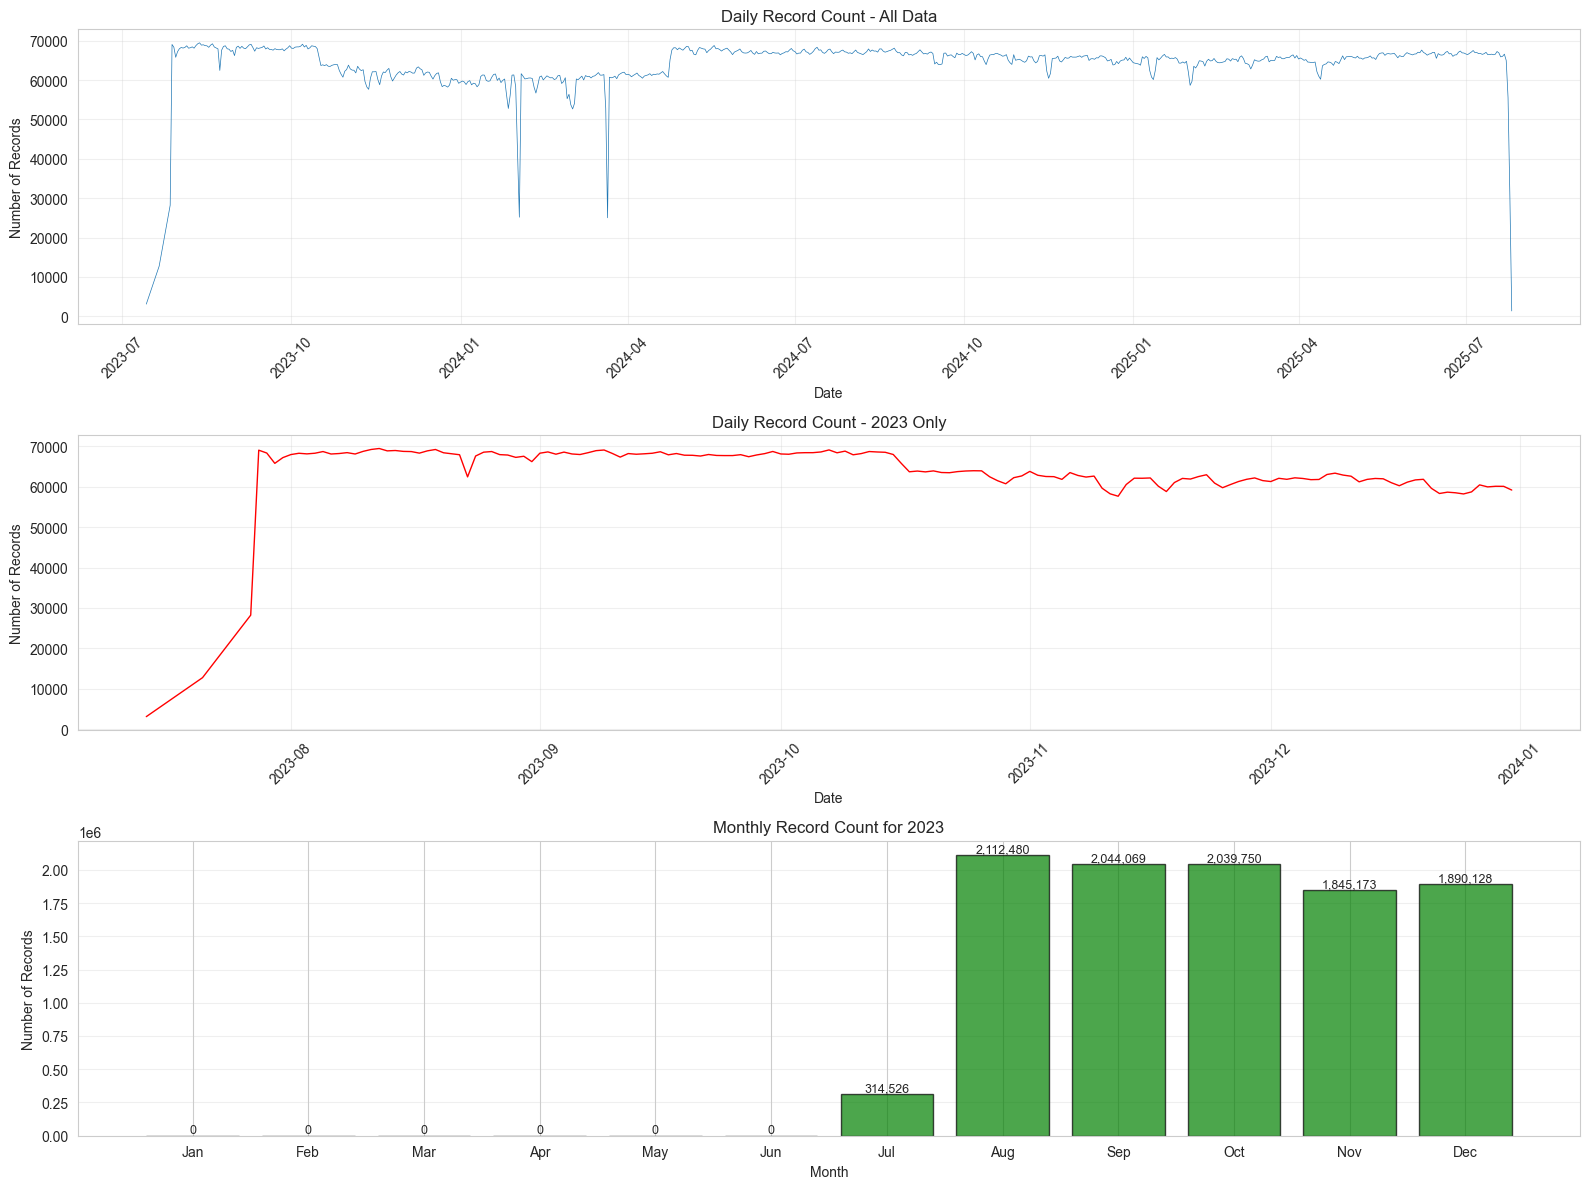

In [9]:
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

daily_counts = df_raw.groupby(df_raw[timestamp_col].dt.date).size()
axes[0].plot(daily_counts.index, daily_counts.values, linewidth=0.5)
axes[0].set_title('Daily Record Count - All Data', fontsize=12)
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Number of Records')
axes[0].grid(True, alpha=0.3)
axes[0].tick_params(axis='x', rotation=45)

daily_counts_2023 = df_2023.groupby(df_2023[timestamp_col].dt.date).size()
axes[1].plot(daily_counts_2023.index, daily_counts_2023.values, linewidth=1, color='red')
axes[1].set_title('Daily Record Count - 2023 Only', fontsize=12)
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Number of Records')
axes[1].grid(True, alpha=0.3)
axes[1].tick_params(axis='x', rotation=45)

months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_2023_values = [df_2023[df_2023['month'] == i].shape[0] for i in range(1, 13)]
colors = ['green' if val > 0 else 'red' for val in monthly_2023_values]
bars = axes[2].bar(months, monthly_2023_values, color=colors, edgecolor='black', alpha=0.7)
axes[2].set_title('Monthly Record Count for 2023', fontsize=12)
axes[2].set_xlabel('Month')
axes[2].set_ylabel('Number of Records')
axes[2].grid(True, alpha=0.3, axis='y')

for bar, val in zip(bars, monthly_2023_values):
    axes[2].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000,
                f'{val:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## 4. PM2.5 Data Availability

In [10]:
print(f"Available parameters: {df_raw['parameter'].unique()}")
print(f"\nParameter value counts:")
print(df_raw['parameter'].value_counts())

df_pm25 = df_raw[df_raw['parameter'] == 'pm25'].copy()
print(f"\nPM2.5 records: {len(df_pm25):,} ({len(df_pm25)/len(df_raw)*100:.1f}% of total)")
print(f"PM2.5 value stats:")
print(f"  Mean: {df_pm25['value'].mean():.2f} {df_pm25['unit'].iloc[0]}")
print(f"  Std: {df_pm25['value'].std():.2f}")
print(f"  Min: {df_pm25['value'].min():.2f}")
print(f"  Max: {df_pm25['value'].max():.2f}")

Available parameters: ['co' 'no' 'no2' 'nox' 'pm25' 'so2' 'pm1' 'pm10' 'relativehumidity'
 'temperature' 'um003']

Parameter value counts:
parameter
no                  10077250
no2                 10066209
nox                  9962149
pm25                 8381097
so2                  6473042
co                   2134846
um003                  17096
relativehumidity       17095
temperature            17095
pm1                    17090
pm10                    5779
Name: count, dtype: int64

PM2.5 records: 8,381,097 (17.8% of total)
PM2.5 value stats:
  Mean: 9.04 µg/m³
  Std: 7.90
  Min: 0.00
  Max: 4170.00


In [11]:
df_2023_pm25 = df_2023[df_2023['parameter'] == 'pm25'].copy()
print(f"2023 records with PM2.5 data: {len(df_2023_pm25):,}")
print(f"Date range with PM2.5: {df_2023_pm25[timestamp_col].min()} to {df_2023_pm25[timestamp_col].max()}")

months_with_pm25 = df_2023_pm25['month'].unique()
print(f"\nMonths with PM2.5 data in 2023: {sorted(months_with_pm25)}")
print(f"Missing PM2.5 months in 2023: {[m for m in range(1,13) if m not in months_with_pm25]}")

2023 records with PM2.5 data: 1,788,748
Date range with PM2.5: 2023-07-14 16:00:00+00:00 to 2023-12-31 23:00:00+00:00

Months with PM2.5 data in 2023: [np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12)]
Missing PM2.5 months in 2023: [1, 2, 3, 4, 5, 6]


In [12]:
monthly_pm25_2023 = df_2023_pm25.groupby('month').agg({
    'value': ['count', 'mean', 'std', 'min', 'max'],
    timestamp_col: ['min', 'max']
})

monthly_pm25_2023.columns = ['_'.join(col).strip() for col in monthly_pm25_2023.columns.values]
display(monthly_pm25_2023)

,value_count,value_mean,value_std,value_min,value_max,datetime_min,datetime_max
month,,,,,,,
7,55553,9.18,6.88,0.00,851.00,2023-07-14 16:00:00+00:00,2023-07-31 23:00:00+00:00
8,366527,7.40,5.34,0.00,481.00,2023-08-01 00:00:00+00:00,2023-08-31 23:00:00+00:00
9,357646,7.90,5.23,0.00,514.00,2023-09-01 00:00:00+00:00,2023-09-30 23:00:00+00:00
10,356159,7.98,7.27,0.00,3089.00,2023-10-01 00:00:00+00:00,2023-10-31 23:00:00+00:00
11,322850,9.65,7.35,0.00,506.00,2023-11-01 00:00:00+00:00,2023-11-30 23:00:00+00:00
12,330013,8.87,7.01,0.00,983.00,2023-12-01 00:00:00+00:00,2023-12-31 23:00:00+00:00


## 5. Geographic Coverage Analysis

In [13]:
location_cols = [col for col in df_raw.columns if 'location' in col.lower() or 'city' in col.lower() or 'station' in col.lower()]
print(f"Location columns: {location_cols}")

location_col = location_cols[0]
locations_by_month = df_2023.groupby(['month', location_col]).size().reset_index(name='count')
locations_summary = locations_by_month.groupby('month')[location_col].nunique()

print("\nUnique locations per month in 2023:")
for month in range(1, 13):
    count = locations_summary.get(month, 0)
    print(f"  Month {month:2d}: {count:3d} locations")

Location columns: ['location_id', 'location_name', 'city']

Unique locations per month in 2023:
  Month  1:   0 locations
  Month  2:   0 locations
  Month  3:   0 locations
  Month  4:   0 locations
  Month  5:   0 locations
  Month  6:   0 locations
  Month  7: 639 locations
  Month  8: 639 locations
  Month  9: 638 locations
  Month 10: 637 locations
  Month 11: 594 locations
  Month 12: 583 locations


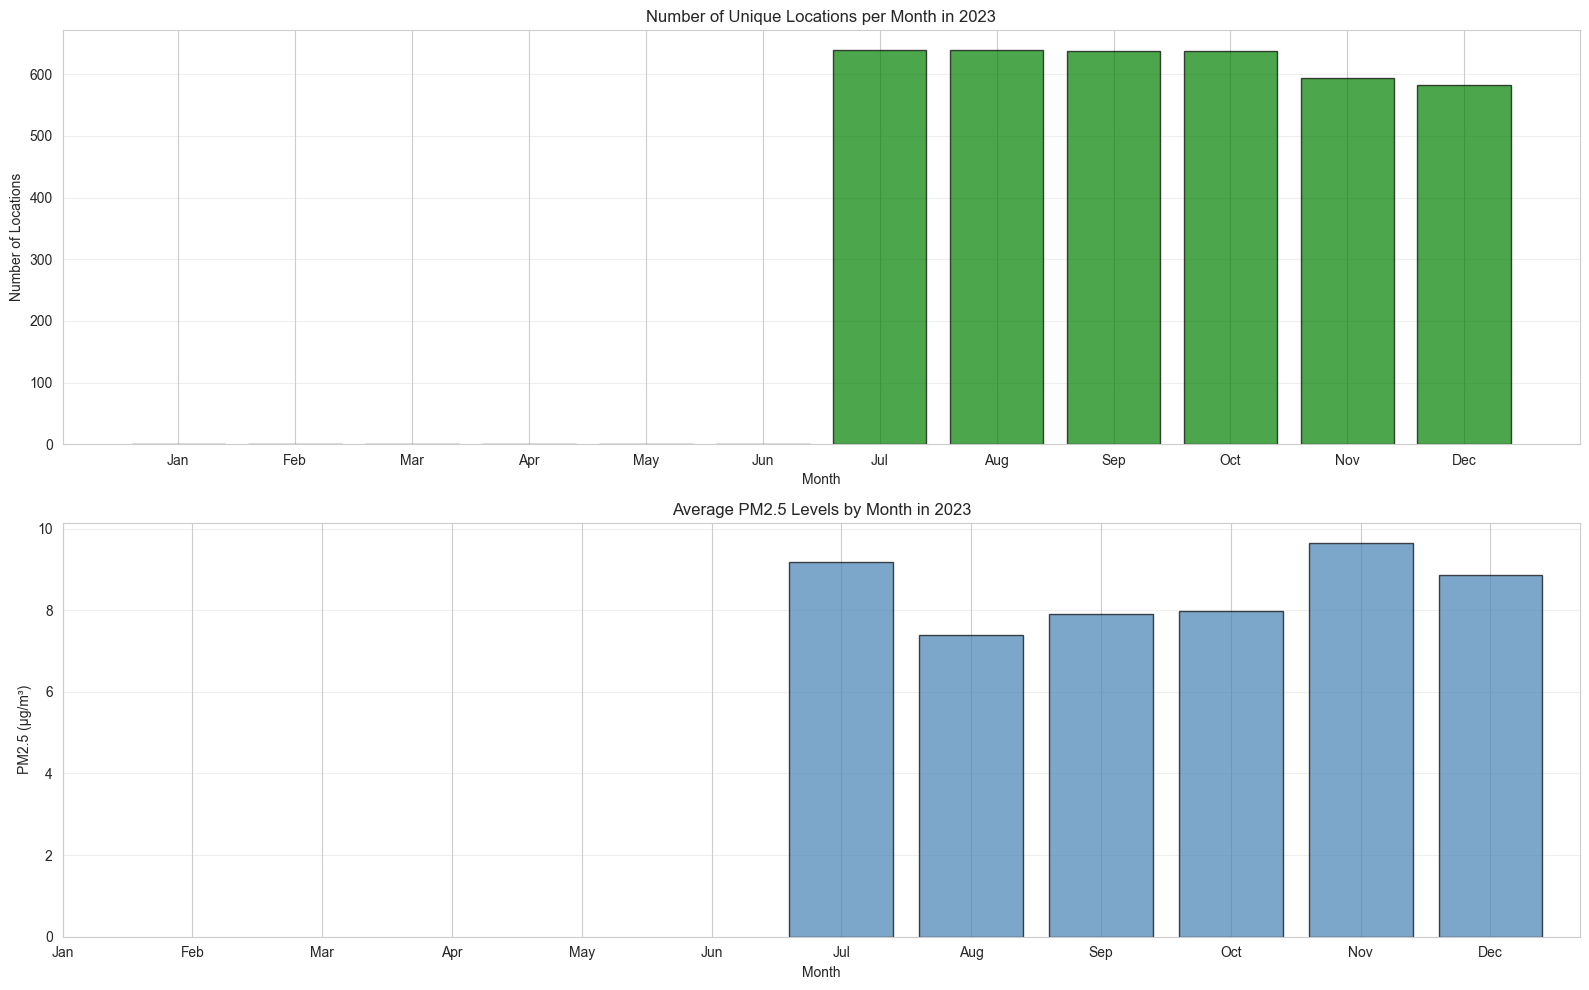

In [14]:
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

monthly_location_counts = [locations_summary.get(m, 0) for m in range(1, 13)]
colors = ['green' if val > 0 else 'red' for val in monthly_location_counts]
axes[0].bar(months, monthly_location_counts, color=colors, edgecolor='black', alpha=0.7)
axes[0].set_title('Number of Unique Locations per Month in 2023', fontsize=12)
axes[0].set_xlabel('Month')
axes[0].set_ylabel('Number of Locations')
axes[0].grid(True, alpha=0.3, axis='y')

pm25_by_month = df_2023_pm25.groupby('month')['value'].mean()
axes[1].bar(pm25_by_month.index, pm25_by_month.values, color='steelblue', edgecolor='black', alpha=0.7)
axes[1].set_title('Average PM2.5 Levels by Month in 2023', fontsize=12)
axes[1].set_xlabel('Month')
axes[1].set_ylabel('PM2.5 (μg/m³)')
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(months)
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

## 6. Data Continuity Analysis

In [15]:
date_range_2023 = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')
actual_dates_2023 = pd.to_datetime(df_2023[timestamp_col].dt.date.unique())
missing_dates_2023 = date_range_2023.difference(actual_dates_2023)

print(f"Expected days in 2023: {len(date_range_2023)}")
print(f"Actual days with data: {len(actual_dates_2023)}")
print(f"Missing days: {len(missing_dates_2023)}")
print(f"\nData coverage: {len(actual_dates_2023)/len(date_range_2023)*100:.1f}%")

Expected days in 2023: 365
Actual days with data: 160
Missing days: 205

Data coverage: 43.8%


In [16]:
missing_periods = []
sorted_missing = sorted(missing_dates_2023)

current_start = sorted_missing[0]
current_end = sorted_missing[0]

for date in sorted_missing[1:]:
    if (date - current_end).days == 1:
        current_end = date
    else:
        missing_periods.append((current_start, current_end))
        current_start = date
        current_end = date

missing_periods.append((current_start, current_end))

print("Missing data periods in 2023:")
for start, end in missing_periods[:10]:
    duration = (end - start).days + 1
    print(f"  {start.date()} to {end.date()} ({duration} days)")

print(f"\nLongest missing period: {max((end - start).days + 1 for start, end in missing_periods)} days")

Missing data periods in 2023:
  2023-01-01 to 2023-07-13 (194 days)
  2023-07-15 to 2023-07-20 (6 days)
  2023-07-22 to 2023-07-26 (5 days)

Longest missing period: 194 days


## 7. Summary Statistics

In [ ]:
print("RAW OPENAQ DATA SUMMARY")
print("="*60)
print(f"\nFull Dataset:")
print(f"  Total records: {len(df_raw):,}")
print(f"  Date range: {df_raw[timestamp_col].min().date()} to {df_raw[timestamp_col].max().date()}")
print(f"  Years covered: {sorted(df_raw['year'].unique())}")

print(f"\n2023 Analysis:")
print(f"  Total 2023 records: {len(df_2023):,}")
print(f"  2023 date range: {df_2023[timestamp_col].min().date()} to {df_2023[timestamp_col].max().date()}")
print(f"  Months with data: {sorted(df_2023['month'].unique())}")
print(f"  Missing months: {[m for m in range(1,13) if m not in df_2023['month'].unique()]}")
print(f"  Data coverage: {len(actual_dates_2023)/365*100:.1f}%")

print(f"\nPM2.5 Data:")
print(f"  Records with PM2.5: {len(df_2023_pm25):,}")
print(f"  PM2.5 coverage: {len(df_2023_pm25)/len(df_2023)*100:.1f}%")
print(f"  Mean PM2.5: {df_2023_pm25['value'].mean():.2f} μg/m³")
print(f"  Std PM2.5: {df_2023_pm25['value'].std():.2f} μg/m³")

print(f"\nKey Finding:")
print(f"  ⚠️ First 6 months of 2023 are completely missing")
print(f"  ✓ Data starts from {df_2023[timestamp_col].min().strftime('%B %d, %Y')}")

RAW OPENAQ DATA SUMMARY

Full Dataset:
  Total records: 47,168,748
  Date range: 2023-07-14 to 2025-07-26
  Years covered: [np.int32(2023), np.int32(2024), np.int32(2025)]

2023 Analysis:
  Total 2023 records: 10,246,126
  2023 date range: 2023-07-14 to 2023-12-31
  Months with data: [np.int32(7), np.int32(8), np.int32(9), np.int32(10), np.int32(11), np.int32(12)]
  Missing months: [1, 2, 3, 4, 5, 6]
  Data coverage: 43.8%

PM2.5 Data:
  Records with PM2.5: 1,788,748
  PM2.5 coverage: 17.5%
  Mean PM2.5: 8.35 μg/m³
  Std PM2.5: 6.54 μg/m³

Key Finding:
  ⚠️ First 6 months of 2023 are completely missing
  ✓ Data starts from July 14, 2023


: 